In [34]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score

### Make two blobs in two dimensional space
- Increasing cluster_std will make blobs larger and more overlapped

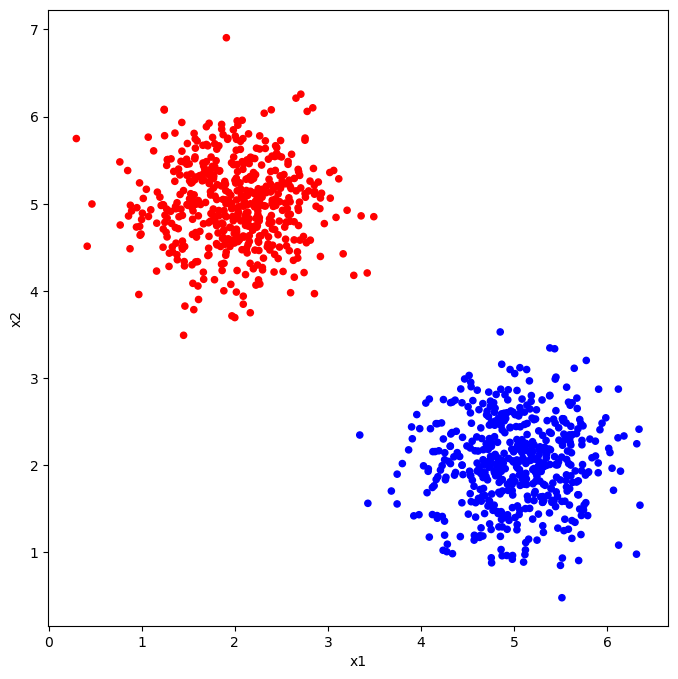

In [35]:
X, Y = make_blobs(n_samples= 1000, 
                  centers = [(2, 5), (5, 2)], 
                  cluster_std= 0.5)

df_blobs = pd.DataFrame(np.c_[X, Y], columns= ['x1', 'x2', 'target'])

df_blobs.plot.scatter(x= 'x1', y= 'x2', 
                c= df_blobs['target'].map({0:'red',1:'blue'}), 
                figsize= (8, 8))
plt.show()

In [36]:
X_train, X_test, y_train, y_test = \
train_test_split(df_blobs[['x1', 'x2']], df_blobs['target'],
                 test_size= 0.2, 
                 stratify= df_blobs['target']
                )

print(f'Training Data Instances: {X_train.shape[0]}')
print(f'Testing Data Instances: {X_test.shape[0]}')

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

Training Data Instances: 800
Testing Data Instances: 200


### Show training data

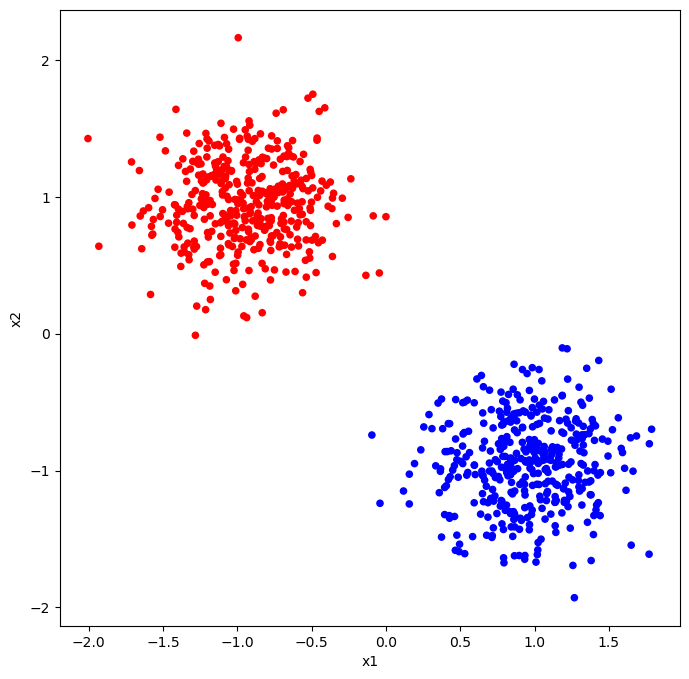

In [37]:
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}), 
                     figsize= (8, 8))
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


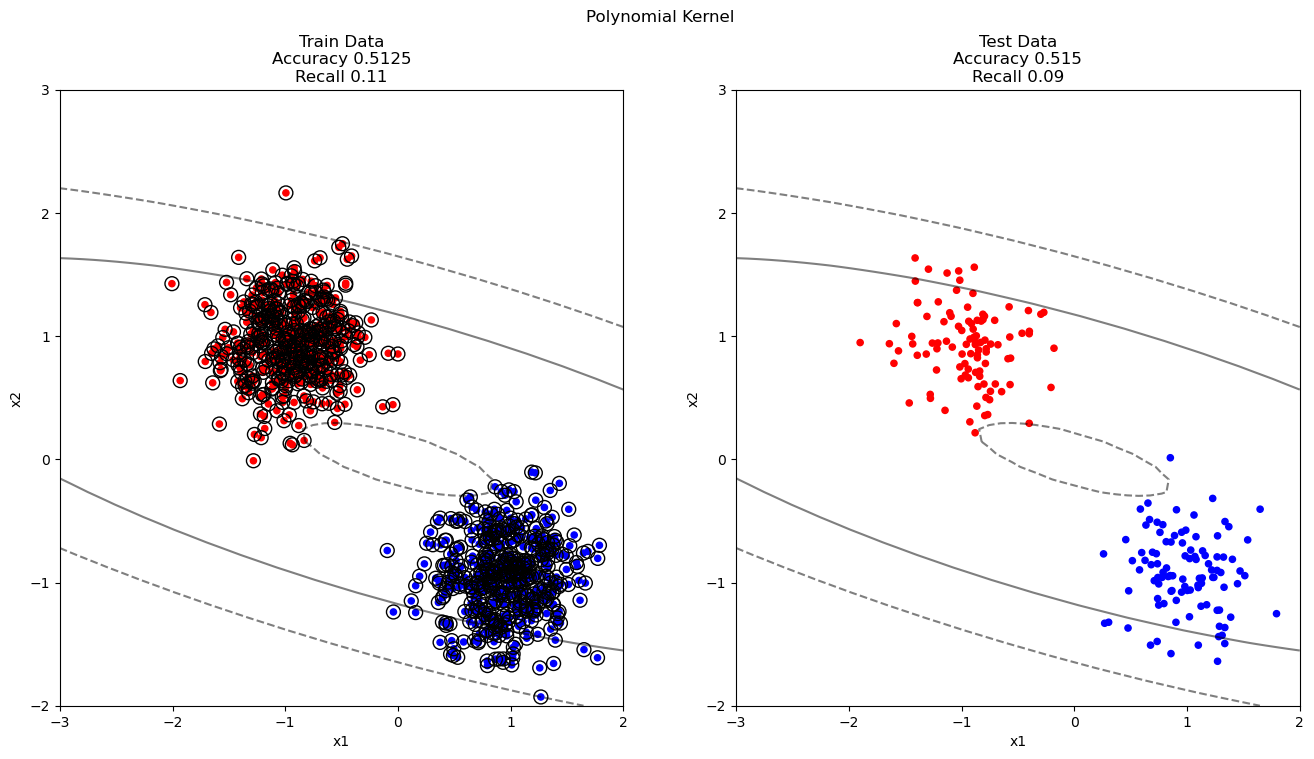

In [39]:
svm_poly = svm.SVC(kernel= 'poly', degree= 2)
svm_poly.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_poly.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('Polynomial Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_poly.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_poly.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_poly.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_poly.predict(X_test)), 10)}')
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


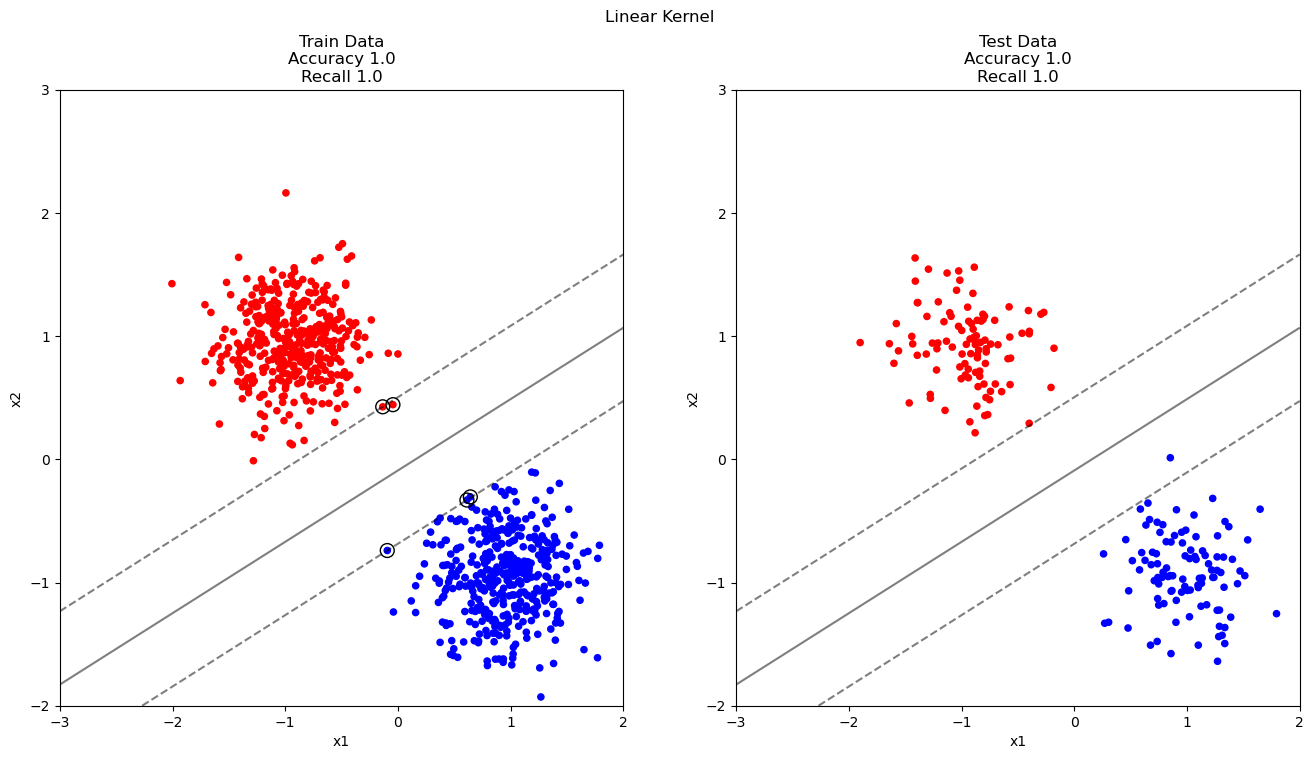

In [40]:
svm_lin = svm.SVC(kernel='linear', C= 1)
svm_lin.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_lin.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('Linear Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_lin.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_lin.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_lin.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_lin.predict(X_test)), 10)}')
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


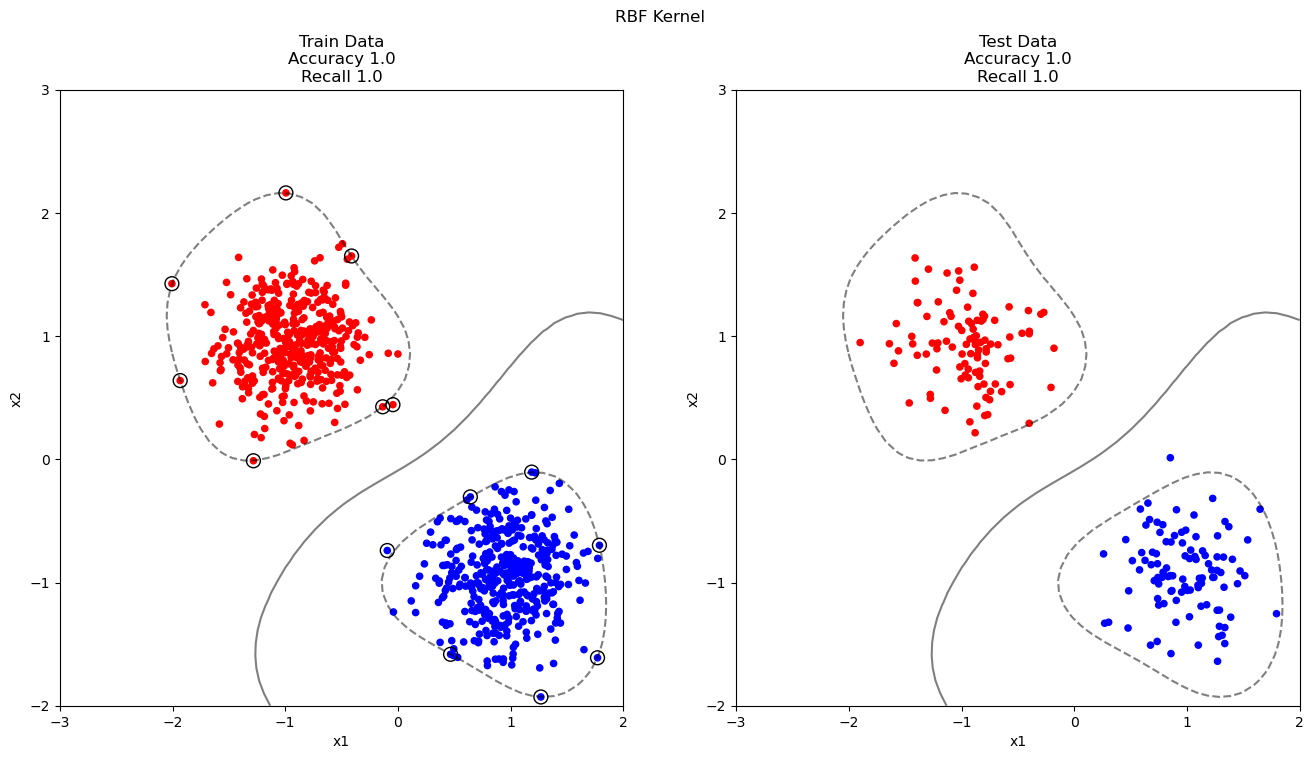

In [41]:
svm_rbf = svm.SVC(kernel='rbf', gamma= 1)
svm_rbf.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_rbf.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('RBF Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_rbf.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_rbf.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_rbf.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_rbf.predict(X_test)), 10)}')
plt.show()

### Make rings

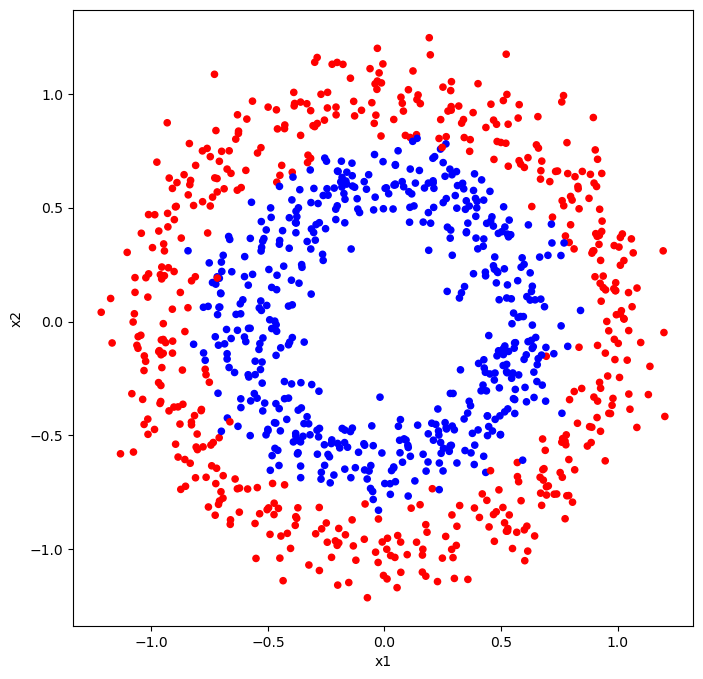

In [42]:
X, Y = make_circles(n_samples= 1000, 
                    noise= 0.1, 
                    factor= 0.6)

df_rings = pd.DataFrame(np.c_[X, Y], columns= ['x1', 'x2', 'target'])

df_rings.plot.scatter(x= 'x1', y= 'x2', 
                      c= df_rings['target'].map({0:'red',1:'blue'}), 
                      figsize= (8, 8))
plt.show()

In [43]:
X_train, X_test, y_train, y_test = \
train_test_split(df_rings[['x1', 'x2']], df_rings['target'],
                 test_size= 0.2, 
                 stratify= df_rings['target']
                )

print(f'Training Data Instances: {X_train.shape[0]}')
print(f'Testing Data Instances: {X_test.shape[0]}')

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

Training Data Instances: 800
Testing Data Instances: 200


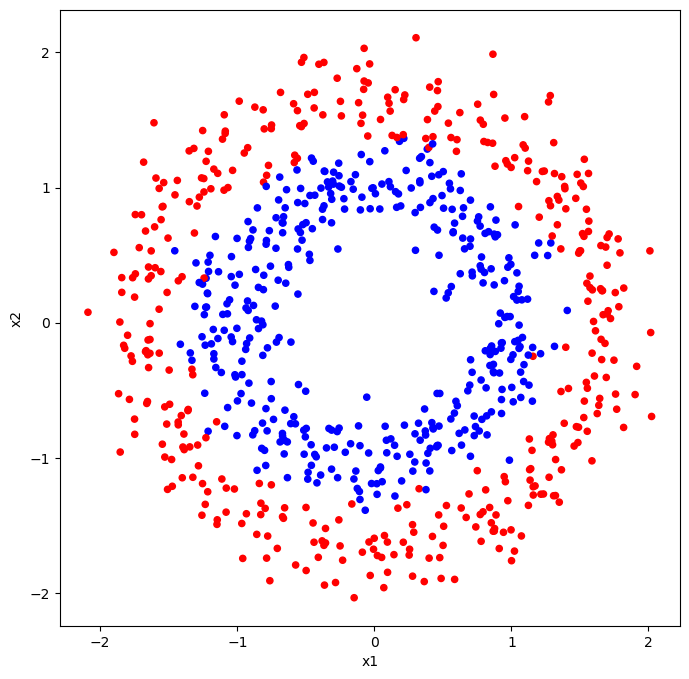

In [44]:
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}), 
                     figsize= (8, 8))
plt.show()

### Polynomial Kernel

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


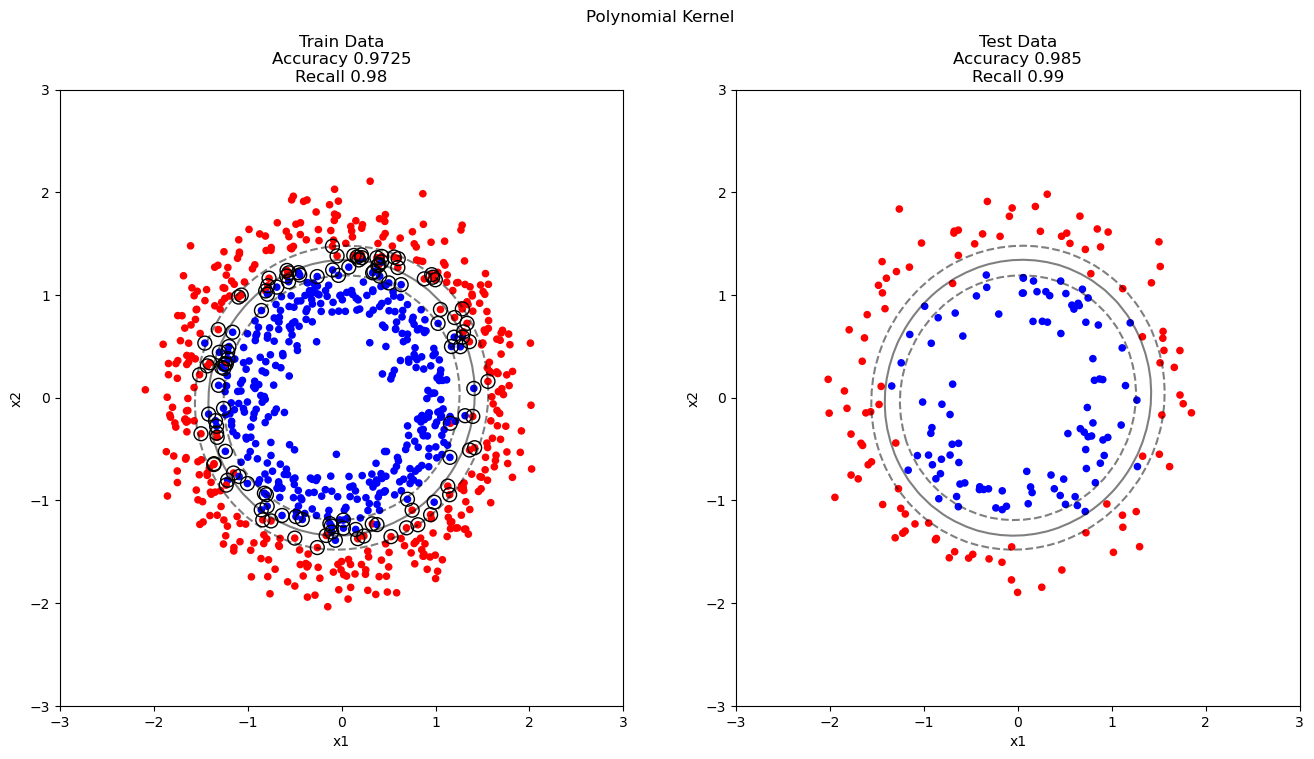

In [46]:
svm_poly = svm.SVC(kernel= 'poly', degree= 2)
svm_poly.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_poly.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('Polynomial Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_poly.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_poly.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_poly.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_poly.predict(X_test)), 10)}')
plt.show()

### Linear Kernel

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


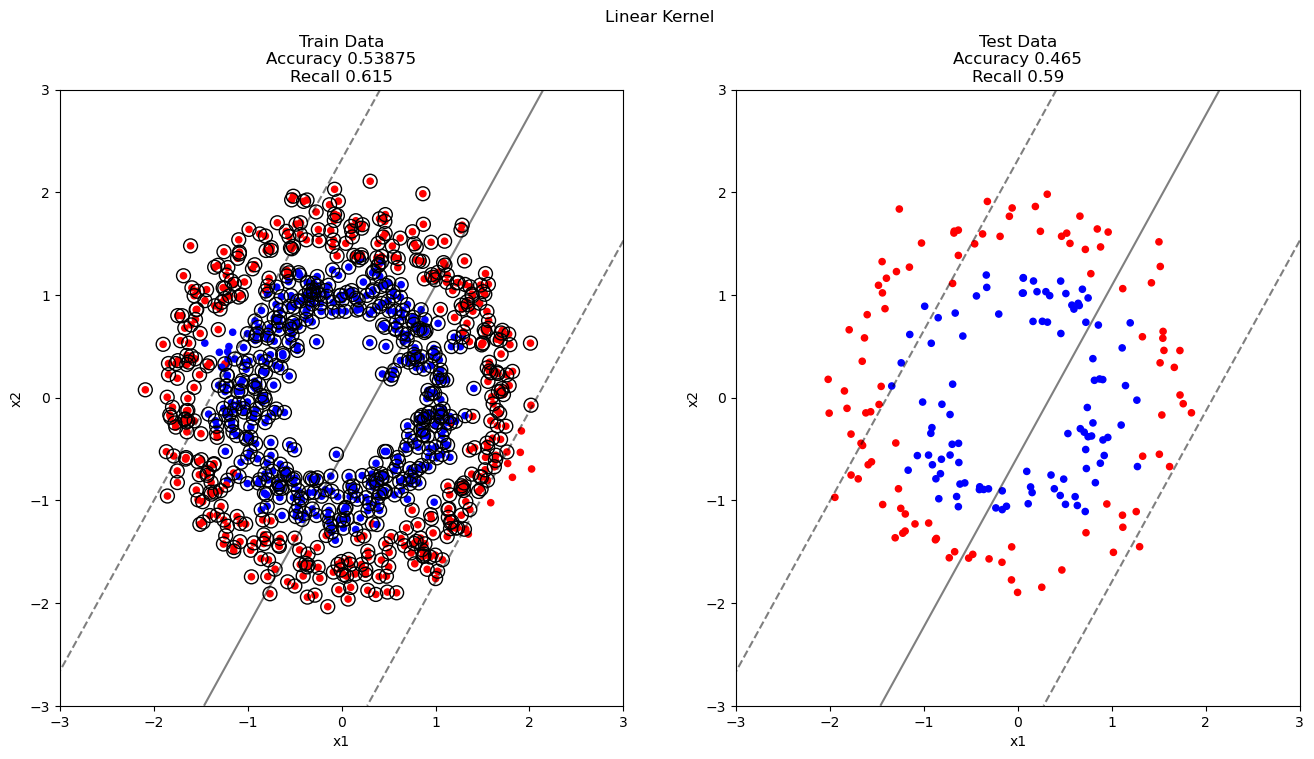

In [47]:
svm_lin = svm.SVC(kernel='linear', C= 0.1)
svm_lin.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_lin.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('Linear Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_lin.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_lin.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_lin.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_lin.predict(X_test)), 10)}')
plt.show()

### Radial Basis Function Kernel

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


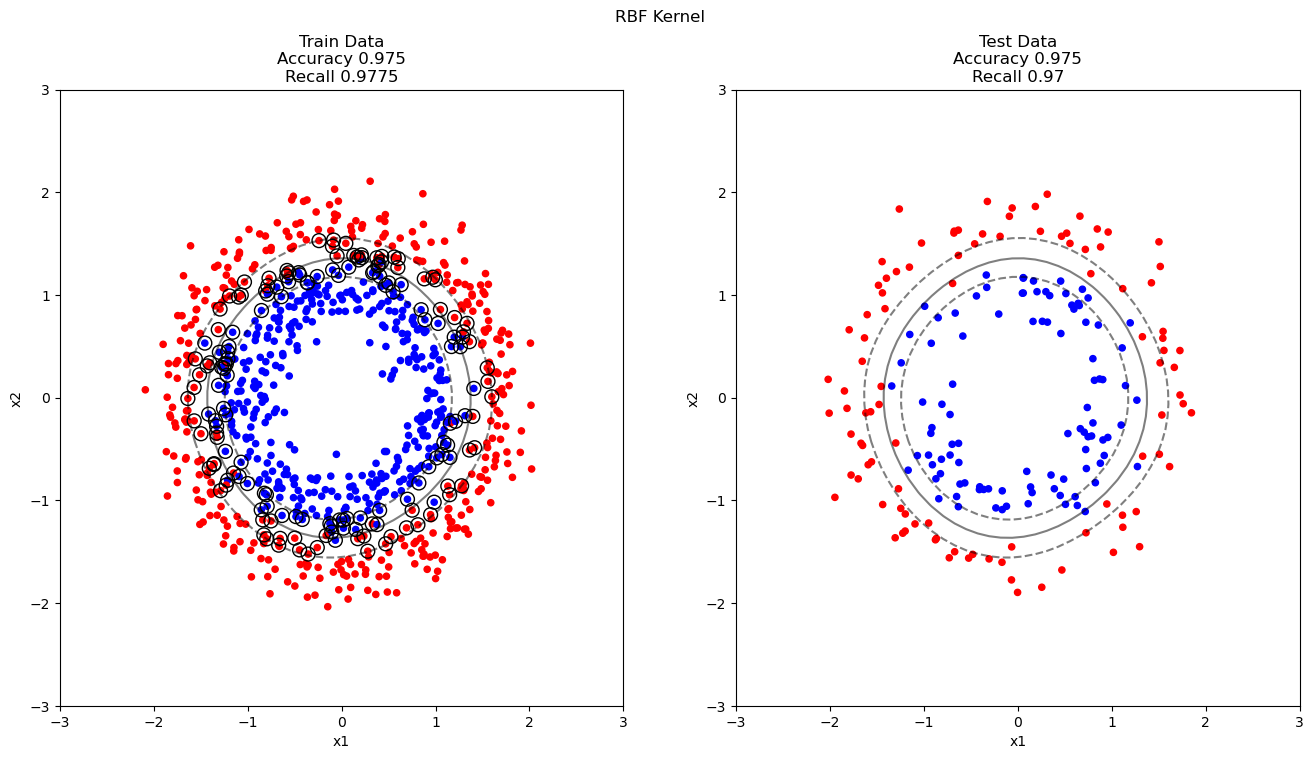

In [48]:
svm_rbf = svm.SVC(kernel='rbf', gamma= 'scale')
svm_rbf.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_rbf.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('RBF Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_rbf.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_rbf.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_rbf.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_rbf.predict(X_test)), 10)}')
plt.show()

### Moons

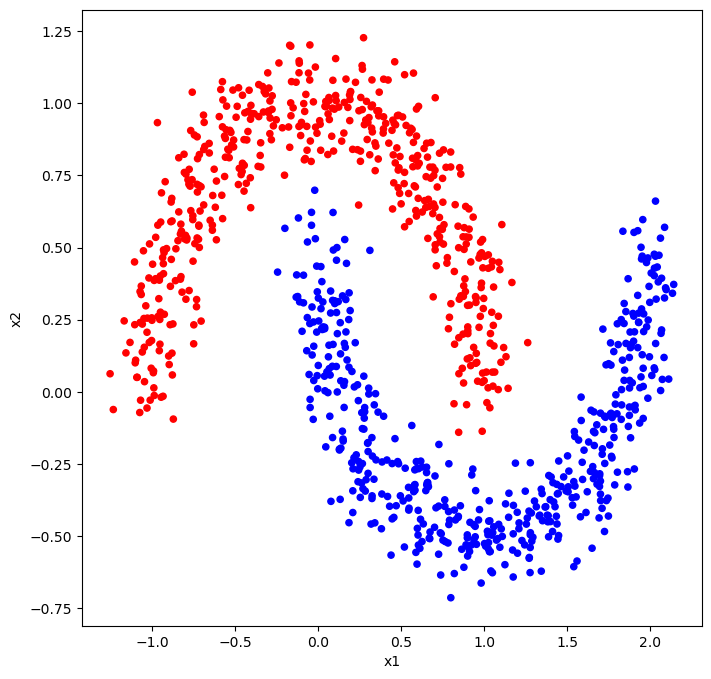

In [49]:
X, Y = make_moons(n_samples= 1000, 
                  noise= 0.1)

df_moons = pd.DataFrame(np.c_[X, Y], columns= ['x1', 'x2', 'target'])

df_moons.plot.scatter(x= 'x1', y= 'x2', 
                c= df_moons['target'].map({0:'red',1:'blue'}), 
                figsize= (8, 8))
plt.show()

In [50]:
X_train, X_test, y_train, y_test = \
train_test_split(df_moons[['x1', 'x2']], df_moons['target'],
                 test_size= 0.2, 
                 stratify= df_moons['target']
                )

print(f'Training Data Instances: {X_train.shape[0]}')
print(f'Testing Data Instances: {X_test.shape[0]}')

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

Training Data Instances: 800
Testing Data Instances: 200


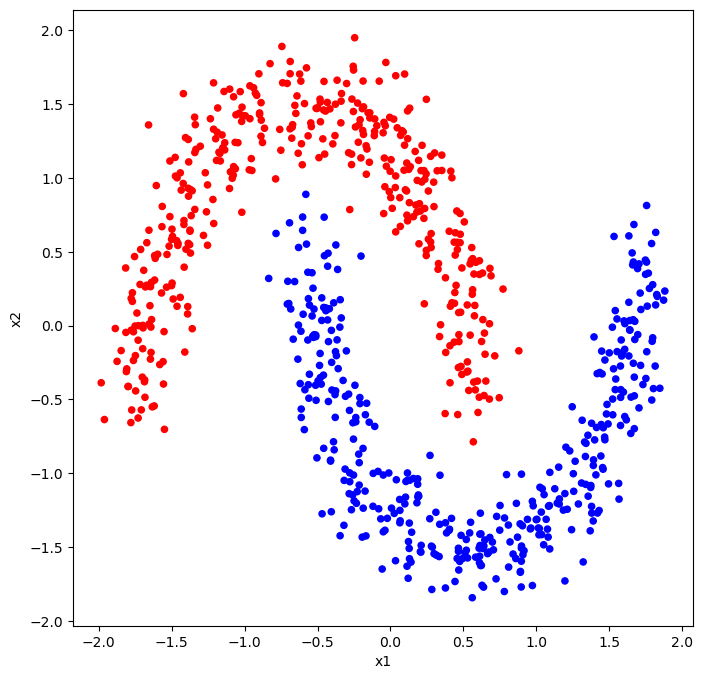

In [51]:
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}), 
                     figsize= (8, 8))
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


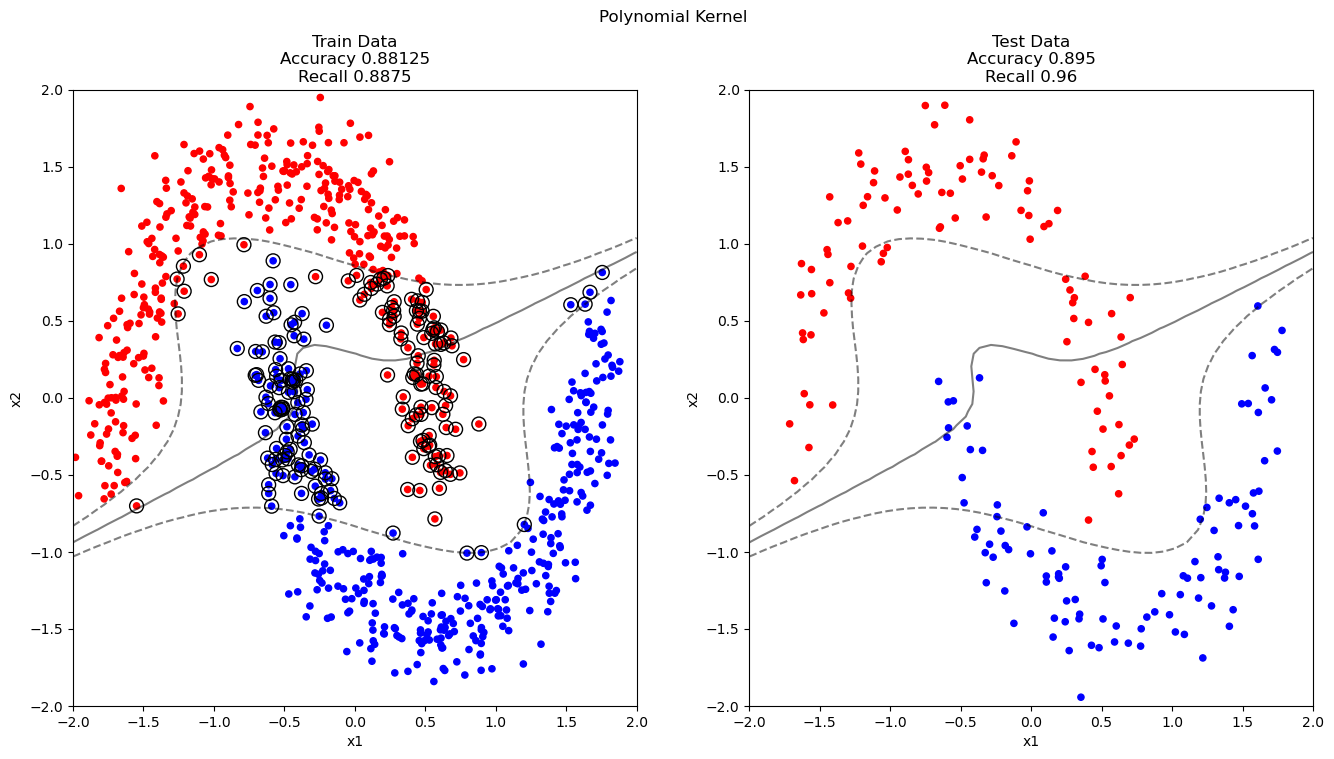

In [53]:
svm_poly = svm.SVC(kernel= 'poly', degree= 3, coef0= 0)
svm_poly.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_poly.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('Polynomial Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_poly.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_poly.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_poly.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_poly.predict(X_test)), 10)}')
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


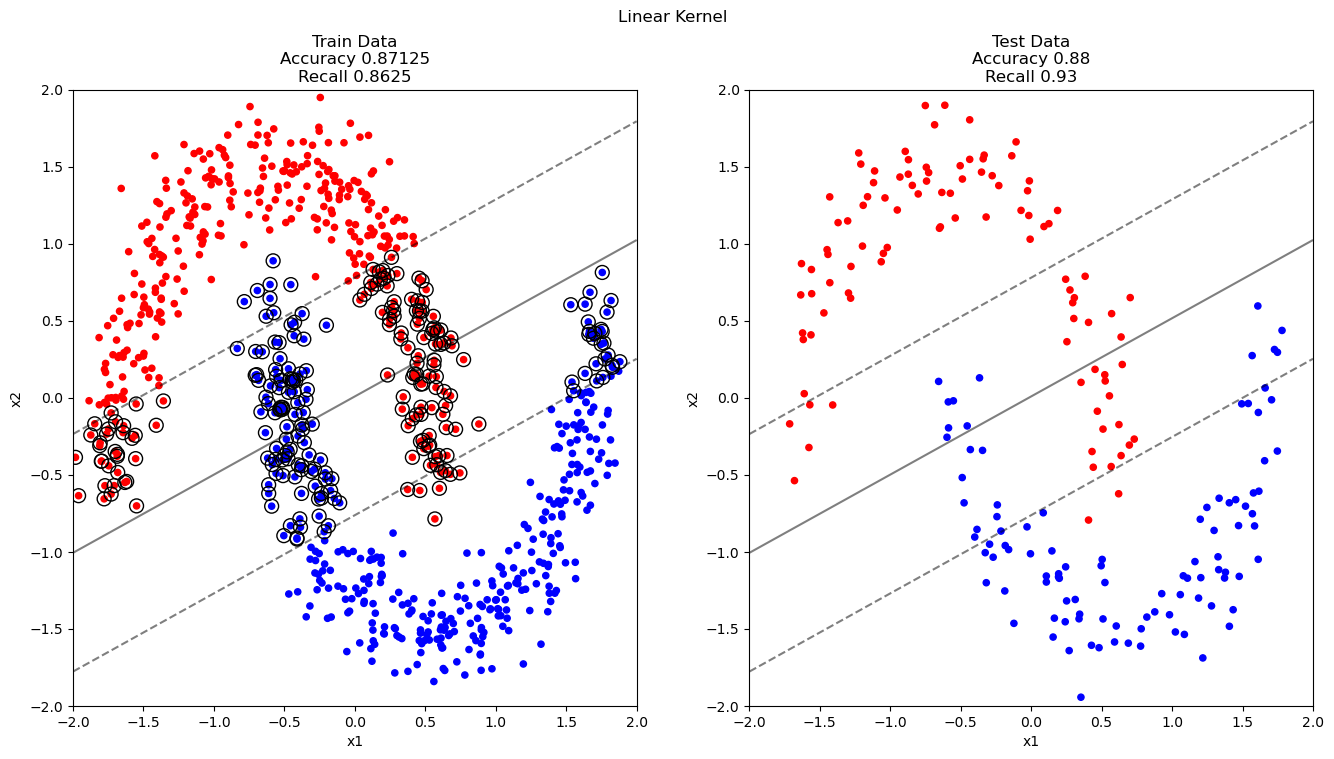

In [54]:
svm_lin = svm.SVC(kernel='linear', C= 0.1)
svm_lin.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_lin.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('Linear Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_lin.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_lin.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_lin.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_lin.predict(X_test)), 10)}')
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


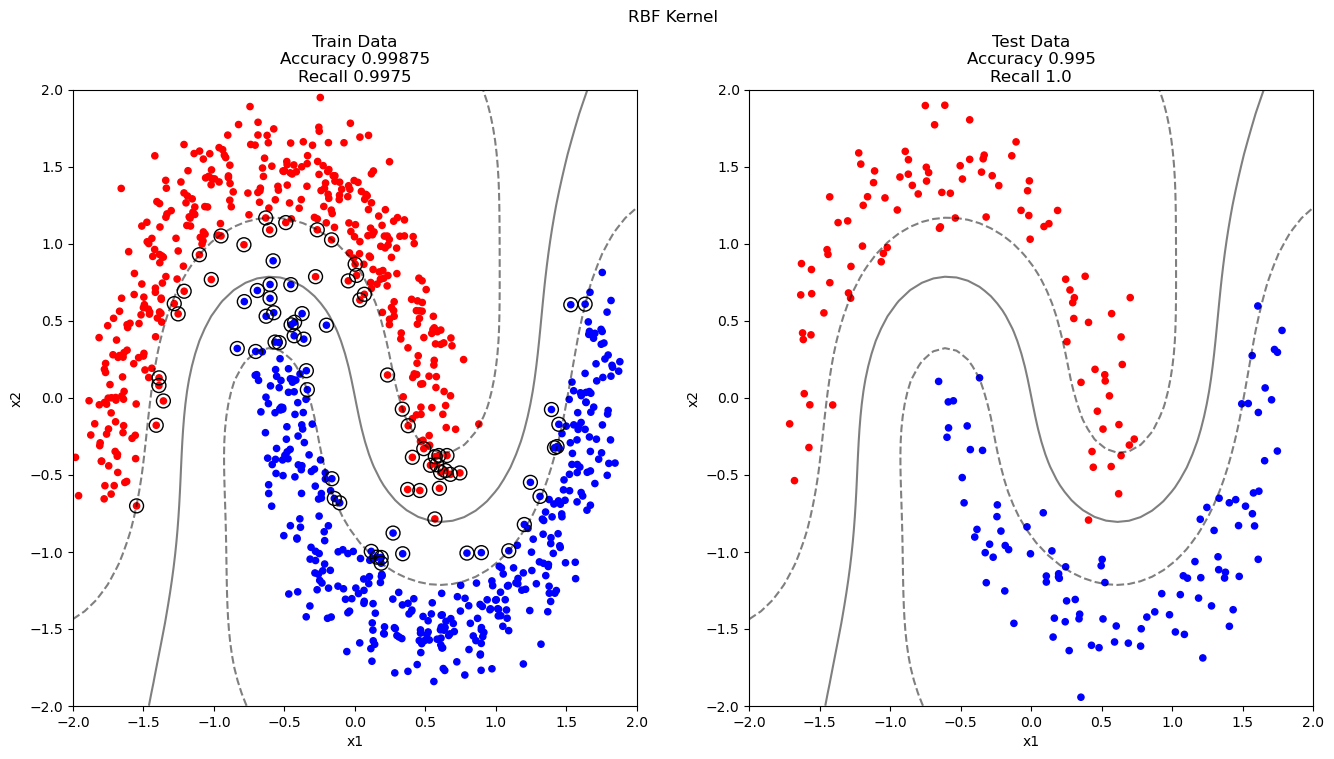

In [55]:
svm_rbf = svm.SVC(kernel='rbf', gamma= 'scale')
svm_rbf.fit(X_train, y_train)

xx = np.linspace(np.floor(X_train.x1.min()),
                 np.ceil(X_train.x1.max()))
yy = np.linspace(np.floor(X_train.x2.min()),
                 np.ceil(X_train.x2.max()))

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_rbf.decision_function(xy).reshape(XX.shape)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
fig.suptitle('RBF Kernel')
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}),
                     ax= ax1)
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax1.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_rbf.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_rbf.predict(X_train)), 10)}')

X_test.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_test.map({0:'red', 1:'blue'}),
                     ax= ax2)
ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_rbf.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_rbf.predict(X_test)), 10)}')
plt.show()